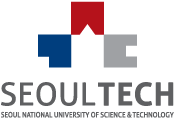

# Lab Session \# 01
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective

The objectives of this lab session are as follows:

1.   To familiarize the student with the development environment that we are going to use in our class, Google Colab
2.   To introduce Numpy and Pandas library for data manipulation and learn the basic functionality

# Jupyter Notebook (Google Colab)

In this section I would like to point out a few points that will help us during our class.


### Accessing Documentation with ?

The Python language and its data science ecosystem are built with the user in mind, and one big part of that is access to documentation.
Every Python object contains a reference to a string, known as a *docstring*, which in most cases will contain a concise summary of the object and how to use it.
Python has a built-in `help` function that can access this information and prints the results.
For example, to see the documentation of the built-in `len` function, you can do the following:

```ipython
In [1]: help(len)
Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.
```

Depending on your interpreter, this information may be displayed as inline text or in a separate pop-up window.

Because finding help on an object is so common and useful, IPython and Jupyter introduce the `?` character as a shorthand for accessing this documentation and other relevant information:

```ipython
In [2]: len?
Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method
```

This notation works for just about anything, including object methods:

```ipython
In [3]: L = [1, 2, 3]
In [4]: L.insert?
Signature: L.insert(index, object, /)
Docstring: Insert object before index.
Type:      builtin_function_or_method
```

or even objects themselves, with the documentation from their type:

```ipython
In [5]: L?
Type:        list
String form: [1, 2, 3]
Length:      3
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
```

Let's try with some functions

### Exploring Modules with Tab Completion

Another useful interface is the use of the Tab key for autocompletion and exploration of the contents of objects, modules, and namespaces.
In the examples that follow, I'll use `<TAB>` to indicate when the Tab key should be pressed.

#### Tab completion of object contents

Every Python object has various attributes and methods associated with it.
Like the `help` function mentioned earlier, Python has a built-in `dir` function that returns a list of these, but the tab-completion interface is much easier to use in practice.
To see a list of all available attributes of an object, you can type the name of the object followed by a period ("`.`") character and the Tab key:

```ipython
In [10]: L.<TAB>
            append() count    insert   reverse
            clear    extend   pop      sort    
            copy     index    remove           
```

To narrow down the list, you can type the first character or several characters of the name, and the Tab key will find the matching attributes and methods:

```ipython
In [10]: L.c<TAB>
             clear() count()
             copy()         

In [10]: L.co<TAB>
              copy()  count()
```


However, since we are working in Google Colab, we should prece CTRL + SPACE to obtain the same behavior. Optionally, you can also write a period ("`.`") and then wait a second and the same list will appear.

Let's try with some functions:

Finally, this is a simple question, how do you find out the type of an object if you don't know it?

<img src="https://miro.medium.com/max/2400/0*eNwKHW934I1awMzH.png" width="200"/>
</div>

# NumPy


---




## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are **vectorized** * (formulated with vectors and matrices), the performance is very good.

Vectorization is the process of converting an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time.

To use `numpy` you need to import the module. By convention, the NumPy module imported under the alias np, like so::

```python
import numpy as np
```

After this, we can access functions and classes in the numpy module using the np namespace.

Let's import numpy

### NumPy arrays
In the numpy package the terminology used for vectors, matrices and higher-dimensional data sets is *array*.

But first, what is an array? Let's refresh a bit.

In computer science, an array data structure, or simply an array, is a data structure consisting of a collection of elements, each identified by at least one array index or key.


![](https://i.imgur.com/mg8O3kd.png)

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, for creating a new vector and matrix arrays from Python lists we can use the `numpy.array` function, as follows:

```python
# a vector (1D array): the argument to the array function is a Python list
vec = np.array([1,2,3,4])
```

```python
# a matrix: the argument to the array function is a nested Python list
mat = np.array([[1, 2], [3, 4]])
```

Lets try!!

In [ ]:
vec = np.array([1,2,3,4])
vec

In [ ]:
mat = np.array([[1, 2], [3, 4]])
mat

In [ ]:
mat3 = np.array([[[1, 2], [3, 4]],[[1, 2], [3, 4]]])
mat3

The `vec` and `mat` objects are both of the type `ndarray` that the `numpy` module provides. Let's check!

```python
type(vec), type(mat)
```

In [ ]:
type(vec), type(mat)

The difference between the `vec` and `mat` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

```python
vec.shape # => (4,)
```

The number of elements in the array is available through the `ndarray.size` property:

```python
vec.size # => 4
mat.size  # => 4
```

Let's try...

Equivalently, we could use the function `numpy.shape` and `numpy.size`

```python
np.shape(vec)
np.size(mat)
```

Try it out!

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

```python
mat.dtype  # => dtype('int64')
```

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

```python
mat[0,0] = "hello"
```

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument:

```python
mat = np.array([[1, 2], [3, 4]], dtype=complex)
```

In [ ]:
mat = np.array([[1, 2], [3, 4]], dtype=complex)

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is impractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:


#### arange
Return evenly spaced values within a given interval.

```python
x = np.arange(0, 10, 1) # arguments: start, stop, step
```

#### linspace and logspace

Both also return evenly spaced numbers over a specified interval.

linspace can include or exclude the endpoint

```python
# using linspace, both end points ARE included
np.linspace(0, 10, 25) # start, stop, num=50, endpoint: optional, dtype: optional)
```

logspace is similar to linspace but using a log scale

```python
np.logspace(0, 10, 10, base=np.e) # start, stop, num=50, endpoint=True, base=10.0, dtype: optional)
```


#### Random data

The function numpy.random.rand creates an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

```python
# uniform random numbers in [0,1]
np.random.rand(5,5)  # d0, d1, ..., dn
```

#### Zeros and ones

These two functions create and array of the given shapes and fill them with zeroes or ones.

```python
np.zeroes(5)  # shape, dtype=float
np.ones((3,2))  # shape, dtype=float
```
Let's try out!

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the [`numpy.genfromtxt`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) function.

Let's check how this works using the california_housing_train.csv that you can fnid in the sample_data folder from your Google Colab environment.

Let's first check the contents of the file, and then load into a new object with the following code:

```python
data = np.genfromtxt('sample_data/california_housing_train.csv', delimiter=',', skip_header=1)
```

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

```python
mat = np.random.rand(3,3)
np.savetxt('random-matrix.csv',mat)
```

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

```python
# vec is a vector, and has only one dimension, taking one index
vec[0]

# mat is a matrix, or a 2 dimensional array, taking two indices
mat[1,1]
mat[1][1]
```

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array)

```python
mat[1]  # row 1
```

The same thing can be achieved with using `:` instead of an index:

```python
mat[1,:] # row 1
mat[0,:] # row 0
mat[:,1] # column 1
```

We can assign new values to elements in an array using indexing:

```python
mat[0,0] = 1  # assing the value of 1 to the first row, first column element

```

It also works for rows and columns

```python
mat[1,:] = 0  # assing the value of 0 to the the second row
mat[:,2] = -1 # assign the value of -1 to the third column
```

Let's explore this

### Index slicing

Index slicing is the technical name for the syntax `mat[lower:upper:step]` to extract part of an array:

Let's create the following array:

```python
a = np.array([1,2,3,4,5])
```

After that, let's try the previous sintax as follows:

```python
a[1:3]
```


Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

```python
a[1:3] = [-2,-3]
```

We can omit any of the three parameters in `M[lower:upper:step]`:

```python
a[::] # lower, upper, step all take the default values
a[::2] # step is 2, lower and upper defaults to the beginning and end of the array
a[:3] # first three elements
a[3:] # elements from index 3
```

Let's try out


Negative indices counts from the end of the array (positive index from the begining):

```python
a[-1] # the last element in the array
a[-3:] # the last three elements
```

Index slicing works exactly the same way for multidimensional arrays:

Let's create the following array:

```python
a = np.array(np.arange(25)).reshape(5,5)
```

And then, let's get a block and some strides from the original array

```python
# a block from the original array
a[1:4, 1:4]

# strides
a[::2, ::2]
```

Let's try out this. Can you guess what will be the output of both statements?

### Fancy indexing

We can use array or lists for slicing an array. For example:

```python
row_indices = [1, 2, 3] # a list of row indexes that we want to keep
col_indices = [1, 2, -1] # a list of column indexes that we want to keep
a[row_indices, col_indices]

```

Let's see this:


We can also use index masks: If the index mask is an Numpy array of data type bool, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element:

```python
b = np.array([n for n in range(5)])
row_mask = np.array([True, False, True, False, False])
b[row_mask]
```

Try it by yourself!

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

For example:

```python
x = np.arange(0, 10, 0.5)
mask = (5 < x) * (x < 7.5)
x[mask]

```

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays.

For example, let's calculate some properties from the California Housing dataset used above.

```python
# Check the shape of the dataset is stored in the data variable:
np.shape(data)  # => (17,000 , 9)
```

Every one of the 9 columns (8 features + response variable) is listed below:

* longitude	(0)
* latitude	(1)
* housing_median_age	(2)
* total_rooms	(3)
* total_bedrooms  (4)
* population	(5)
* households	(6)
* median_income	 (7)
* median_house_value  (8)

Let's compute different statistics using this dataset

In [ ]:
data.shape

#### mean

We can compute the arithmetic mean of a numpy array with the `mean` function. We can choose the axis (0 = by rows, 1 = by columns)

```python
np.mean(data[:,3])  # compute the mean of the fourth column
data[:,3].mean()    
```

Using the `axis` argument we can specify to what dimension we apply the function:

```pyhthon
np.mean(axis=1)     # compute the mean of all the columns
```

Let's explore this function:

#### Other statistics

We can compute other statistics i the same way, the most common are:

* Standard deviation -- `np.std`
* Variance -- `np.var`
* Minimum -- `np.min`
* Maximum -- `np.max`
* Summation -- `np.sum`
* Product -- `np.prod`
* Cummulative summation -- `np.cumsum`
* Unique values -- `np.unique`

Let's try all of this functions~



### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example:

```python

mean_greater_than_mean_idx = data[:,8]>data[:,8].mean()
data[:,8][mean_greater_than_mean_idx].mean()

```
Remember that the attribute of index 8 is median_house_value


Can you explain what is the meaning of the output of that computation?

Try!

## Reshaping and resizing arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

Let's first get the size of matrix `a`, and store those values in n and m variabels.

```python
n, m = a.shape
```

Now we can use the reshape argument to change the shape of our matrix `a`.

```python
a.reshape((1,n*m))
```

The new shape should have the same size, for example (2,5) and (1,10)

Let's try

We can also use the function `flatten` to make a higher-dimensional array into a vector.

b = a.flatten()

# Pandas

Now we'll build on the previous learned knowledge by looking in depth at the data structures provided by the Pandas library.
Pandas is a newer package built on top of NumPy that provides an efficient implementation of a `DataFrame`.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we've seen, NumPy's `ndarray` data structure provides essential features for the type of **clean, well-organized data typically seen in numerical computing tasks.**
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its `Series` and `DataFrame` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.


## Introducing Pandas Objects

At a very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this session, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's take a look at these three fundamental Pandas data structures: the `Series`, `DataFrame`, and `Index`.

We will start our code sessions with the standard Pandas import:

## The Pandas Series Object

A Pandas `Series` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

The `Series` combines a sequence of values with an explicit sequence of indices, which we can access with the `values` and `index` attributes.
The `values` are simply a familiar NumPy array:

The `index` is an array-like object of type `pd.Index`, which we'll discuss in more detail momentarily:

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

As we will see, though, the Pandas `Series` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### Series as Generalized NumPy Array

From what we've seen so far, the `Series` object may appear to be basically interchangeable with a one-dimensional NumPy array.
The essential difference is that while the NumPy array has an *implicitly defined* integer index used to access the values, the Pandas `Series` has an *explicitly defined* index associated with the values.

This explicit index definition gives the `Series` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
So, if we wish, we can use strings as an index:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

And the item access works as expected:

We can even use noncontiguous or nonsequential indices:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

### Series as Specialized Dictionary

In this way, you can think of a Pandas `Series` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure that maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas `Series` makes it more efficient than Python dictionaries for certain operations.

The `Series`-as-dictionary analogy can be made even more clear by constructing a `Series` object directly from a Python dictionary, here the five most populous US states according to the 2020 census:

In [ ]:
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}
population = pd.Series(population_dict)
population

From here, typical dictionary-style item access can be performed:

Unlike a dictionary, though, the `Series` also supports array-style operations such as slicing:

We'll discuss some of the quirks of Pandas indexing and slicing later.

### Constructing Series Objects

We've already seen a few ways of constructing a Pandas `Series` from scratch. All of them are some version of the following:

```python
pd.Series(data, index=index)
```

where `index` is an optional argument, and `data` can be one of many entities.

For example, `data` can be a list or NumPy array, in which case `index` defaults to an integer sequence:

In [ ]:
pd.Series([2, 4, 6])

Or `data` can be a scalar, which is repeated to fill the specified index:

In [ ]:
pd.Series(5, index=[100, 200, 300])

Or it can be a dictionary, in which case `index` defaults to the dictionary keys:

In each case, the index can be explicitly set to control the order or the subset of keys used:

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the `DataFrame`.
Like the `Series` object discussed in the previous section, the `DataFrame` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as Generalized NumPy Array
If a `Series` is an analog of a one-dimensional array with explicit indices, a `DataFrame` is an analog of a two-dimensional array with explicit row and column indices.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a `DataFrame` as a sequence of aligned `Series` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new `Series` listing the area of each of the five states discussed in the previous section (in square kilometers):

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312,
             'New York': 141297, 'Pennsylvania': 119280}
area = pd.Series(area_dict)
area

Now that we have this along with the `population` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

Like the `Series` object, the `DataFrame` has an `index` attribute that gives access to the index labels:

Additionally, the `DataFrame` has a `columns` attribute, which is an `Index` object holding the column labels:

Thus the `DataFrame` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as Specialized Dictionary

Similarly, we can also think of a `DataFrame` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a `DataFrame` maps a column name to a `Series` of column data.
For example, asking for the `'area'` attribute returns the `Series` object containing the areas we saw earlier:

Notice the potential point of confusion here: in a two-dimensional NumPy array, `data[0]` will return the first *row*. For a `DataFrame`, `data['col0']` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s later

### Constructing DataFrame Objects

A Pandas `DataFrame` can be constructed in a variety of ways.
Here we'll explore several examples.

#### From a single Series object

A `DataFrame` is a collection of `Series` objects, and a single-column `DataFrame` can be constructed from a single `Series`:

#### From a list of dicts

Any list of dictionaries can be made into a `DataFrame`.
We'll use a simple list comprehension to create some data:

Even if some keys in the dictionary are missing, Pandas will fill them in with `NaN` values (i.e., "Not a Number"):

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

#### From a dictionary of Series objects

As we saw before, a `DataFrame` can be constructed from a dictionary of `Series` objects as well:

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a `DataFrame` with any specified column and index names.
If omitted, an integer index will be used for each:

## The Pandas Index Object

As you've seen, the `Series` and `DataFrame` objects both contain an explicit *index* that lets you reference and modify data.
This `Index` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multiset, as `Index` objects may contain repeated values).
Those views have some interesting consequences in terms of the operations available on `Index` objects.
As a simple example, let's construct an `Index` from a list of integers:

### Index as Immutable Array

The `Index` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

`Index` objects also have many of the attributes familiar from NumPy arrays:

One difference between `Index` objects and NumPy arrays is that the indices are immutable—that is, they cannot be modified via the normal means:

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

# Data Indexing and Selection

## Data Selection in Series

As learned before, a `Series` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary.
If you keep these two overlapping analogies in mind, it will help you understand the patterns of data indexing and selection in these arrays.

### Series as Dictionary

Like a dictionary, the `Series` object provides a mapping from a collection of keys to a collection of values:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

`Series` objects can also be modified with a dictionary-like syntax.
Just as you can extend a dictionary by assigning to a new key, you can extend a `Series` by assigning to a new index value:

This easy mutability of the objects is a convenient feature: under the hood, Pandas is making decisions about memory layout and data copying that might need to take place, and the user generally does not need to worry about these issues.

### Series as One-Dimensional Array

A `Series` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays—that is, slices, masking, and fancy indexing.
Examples of these are as follows:

In [ ]:
# slicing by explicit index


In [ ]:
# slicing by implicit integer index


In [ ]:
# masking


In [ ]:
# fancy indexing


Of these, slicing may be the source of the most confusion.
Notice that when slicing with an explicit index (e.g., `data['a':'c']`), the final index is *included* in the slice, while when slicing with an implicit index (e.g., `data[0:2]`), the final index is *excluded* from the slice.

### Indexers: loc and iloc

If your `Series` has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, while a slicing operation like `data[1:3]` will use the implicit Python-style indices:

In [5]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

,0
1,a
3,b
5,c


In [4]:
# explicit index when indexing
data[5]

'c'

In [7]:
# implicit index when slicing
data.iloc[0]

'a'

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the `Series`.

First, the `loc` attribute allows indexing and slicing that always references the explicit index:

The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index:

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of `loc` and `iloc` makes them helpful in maintaining clean and readable code; especially in the case of integer indexes, using them consistently can prevent subtle bugs due to the mixed indexing/slicing convention.

## Data Selection in DataFrames

Recall that a `DataFrame` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of `Series` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as Dictionary

The first analogy we will consider is the `DataFrame` as a dictionary of related `Series` objects.
Let's return to our example of areas and populations of states:

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})
pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249,
                 'Pennsylvania': 13002700})
data = pd.DataFrame({'area':area, 'pop':pop})
data

The individual `Series` that make up the columns of the `DataFrame` can be accessed via dictionary-style indexing of the column name:

Equivalently, we can use attribute-style access with column names that are strings:

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the `DataFrame`, this attribute-style access is not possible.
For example, the `DataFrame` has a `pop` method, so `data.pop` will point to this rather than the `pop` column:

In particular, you should avoid the temptation to try column assignment via attributes (i.e., use `data['pop'] = z` rather than `data.pop = z`).

Like with the `Series` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

This shows a preview of the straightforward syntax of element-by-element arithmetic between `Series` objects; we'll dig into this further in a bit

### DataFrame as Two-Dimensional Array

As mentioned previously, we can also view the `DataFrame` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the `values` attribute:

With this picture in mind, many familiar array-like operations can be done on the `DataFrame` itself.
For example, we can transpose the full `DataFrame` to swap rows and columns:

When it comes to indexing of a `DataFrame` object, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

and passing a single "index" to a `DataFrame` accesses a column:

Thus, for array-style indexing, we need another convention.
Here Pandas again uses the `loc` and `iloc` indexers mentioned earlier.
Using the `iloc` indexer, we can index the underlying array as if it were a simple NumPy array (using the implicit Python-style index), but the `DataFrame` index and column labels are maintained in the result:

Similarly, using the `loc` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the `loc` indexer we can combine masking and fancy indexing as follows:

Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple `DataFrame` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

# Operating on Data in Pandas

One of the strengths of NumPy is that it allows us to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more complicated operations (trigonometric functions, exponential and logarithmic functions, etc.).
Pandas inherits much of this functionality from NumPy.

Pandas includes a couple of useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.
This means that keeping the context of data and combining data from different sources—both potentially error-prone tasks with raw NumPy arrays—become essentially foolproof with Pandas.
We will additionally see that there are well-defined operations between one-dimensional `Series` structures and two-dimensional `DataFrame` structures.

## Ufuncs: Index Preservation

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas `Series` and `DataFrame` objects.
Let's start by defining a simple `Series` and `DataFrame` on which to demonstrate this:

In [ ]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0, 10, 4))
ser

In [ ]:
df = pd.DataFrame(rng.integers(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved:*

This is true also for more involved sequences of operations:

Any of the numpy ufuncs can be used in a similar manner (e.g., add, substract, negative, positive, absolute, log, log2, log10, sqrt, etc).

Try it!

## Ufuncs: Index Alignment

For binary operations on two `Series` or `DataFrame` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

### Index Alignment in Series

As an example, suppose we are combining two different data sources and wish to find only the top three US states by *area* and the top three US states by *population*:

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 39538223, 'Texas': 29145505,
                        'Florida': 21538187}, name='population')

Let's see what happens when we divide these to compute the population density:

The resulting array contains the *union* of indices of the two input arrays, which could be determined directly from these indices:

Any item for which one or the other does not have an entry is marked with `NaN`, or "Not a Number," which is how Pandas marks missing data.
This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are marked by `NaN`:

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])


If using `NaN` values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.
For example, calling ``A.add(B)`` is equivalent to calling ``A + B``, but allows optional explicit specification of the fill value for any elements in ``A`` or ``B`` that might be missing:

### Index Alignment in DataFrames

A similar type of alignment takes place for *both* columns and indices when performing operations on `DataFrame` objects:

In [ ]:
A = pd.DataFrame(rng.integers(0, 20, (2, 2)),
                 columns=['a', 'b'])
A

In [ ]:
B = pd.DataFrame(rng.integers(0, 10, (3, 3)),
                 columns=['b', 'a', 'c'])
B

In [ ]:
A + B

Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.
As was the case with `Series`, we can use the associated object's arithmetic methods and pass any desired `fill_value` to be used in place of missing entries.
Here we'll fill with the mean of all values in `A`:

In [ ]:
A.add(B, fill_value=A.values.mean())

The following table lists Python operators and their equivalent Pandas object methods:

| Python operator | Pandas method(s)                |
|-----------------|---------------------------------|
| `+`             | `add`                           |
| `-`             | `sub`, `subtract`               |
| `*`             | `mul`, `multiply`               |
| `/`             | `truediv`, `div`, `divide`      |
| `//`            | `floordiv`                      |
| `%`             | `mod`                           |
| `**`            | `pow`                           |


# Handling Missing Data

Data in the real world is rarely clean and homogeneous.
In particular, many interesting datasets will have some amount of data missing.
To make matters even more complicated, different data sources may indicate missing data in different ways.

Let's finalize our Lab session 1 by discussing some general considerations for missing data, look at how Pandas chooses to represent it, and explore some built-in Pandas tools for handling missing data in Python.
Here and throughout the course, we will refer to missing data in general as *null*, *NaN*, or *NA* values.

## Trade-offs in Missing Data Conventions

A number of approaches have been developed to track the presence of missing data in a table or `DataFrame`.
Generally, they revolve around one of two strategies: using a *mask* that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it might involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with –9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with `NaN` (Not a Number), a special value that is part of the IEEE floating-point specification.

Neither of these approaches is without trade-offs. Use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often nonoptimized) logic in CPU and GPU arithmetic, because common special values like `NaN` are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions.
For example, the R language uses reserved bit patterns within each data type as sentinel values indicating missing data, while the SciDB system uses an extra byte attached to every cell to indicate an NA state.

## Missing Data in Pandas

Pandas has two "modes" of storing and manipulating null values:

- The default mode is to use a sentinel-based missing data scheme, with sentinel values `NaN` or `None` depending on the type of the data.
- Alternatively, you can opt in to using the nullable data types (dtypes) Pandas provides (discussed later in this chapter), which results in the creation an accompanying mask array to track missing entries. These missing entries are then presented to the user as the special `pd.NA` value.

In either case, the data operations and manipulations provided by the Pandas API will handle and propagate those missing entries in a predictable manner. But to develop some intuition into *why* these choices are made, let's dive quickly into the trade-offs inherent in `None`, `NaN`, and `NA`.

### NaN: Missing Numerical Data

`NaN` is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [10]:
vals2 = np.array([1, np.nan, 3, 4])
vals2

array([ 1., nan,  3.,  4.])

Notice that NumPy chose a native floating-point type for this array: this means that this array supports fast operations pushed into compiled code.
Keep in mind that `NaN` is a bit like a data virus—it infects any other object it touches.
Regardless of the operation, the result of arithmetic with `NaN` will be another `NaN`:

In [11]:
1+np.nan

nan

In [12]:
0+np.nan

nan

This means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful:

In [14]:
vals2.sum()

nan

That said, NumPy does provide ``NaN``-aware versions of aggregations that will ignore these missing values:

The main downside of `NaN` is that it is specifically a floating-point value; there is no equivalent `NaN` value for integers, strings, or other types.

### NaN and None in Pandas

`NaN` and `None` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [15]:
pd.Series([1, np.nan, 2, None])

,0
0,1.0
1,NaN
2,2.0
3,NaN


For types that don't have an available sentinel value, Pandas automatically typecasts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [ ]:
x = pd.Series(range(2), dtype=int)
x

## Pandas Nullable Dtypes

In early versions of Pandas, `NaN` and `None` as sentinel values were the only missing data representations available. The primary difficulty this introduced was with regard to the implicit type casting: for example, there was no way to represent a true integer array with missing data.

To address this difficulty, Pandas later added *nullable dtypes*, which are distinguished from regular dtypes by capitalization of their names (e.g., `pd.Int32` versus `np.int32`). For backward compatibility, these nullable dtypes are only used if specifically requested.

For example, here is a `Series` of integers with missing data, created from a list containing all three available markers of missing data:

In [17]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')

,0
0,1
1,<NA>
2,2
3,<NA>
4,<NA>


This representation can be used interchangeably with the others in all the operations explored through the rest of this course.

## Operating on Null Values

As we have seen, Pandas treats `None`, `NaN`, and `NA` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, Pandas provides several methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull``: Generates a Boolean mask indicating missing values
- ``notnull``: Opposite of ``isnull``
- ``dropna``: Returns a filtered version of the data
- ``fillna``: Returns a copy of the data with missing values filled or imputed

We will conclude this session with a brief exploration and demonstration of these routines.

### Detecting Null Values
Pandas data structures have two useful methods for detecting null data: `isnull` and `notnull`.
Either one will return a Boolean mask over the data. For example:

In [22]:
data = pd.Series([1, np.nan, 'hello', None])
data

,0
0,1
1,NaN
2,hello
3,None


In [23]:
data.isnull()

,0
0,False
1,True
2,False
3,True


As mentioned before, Boolean masks can be used directly as a `Series` or `DataFrame` index:

In [25]:
data[data.notnull()]

,0
0,1
2,hello


The `isnull()` and `notnull()` methods produce similar Boolean results for ``DataFrame`` objects.

### Dropping Null Values

In addition to these masking methods, there are the convenience methods `dropna`
(which removes NA values) and `fillna` (which fills in NA values). For a `Series`,
the result is straightforward:

In [26]:
data.dropna()

,0
0,1
2,hello


For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [27]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a `DataFrame`; we can only drop entire rows or columns.
Depending on the application, you might want one or the other, so `dropna` includes a number of options for a `DataFrame`.

By default, `dropna` will drop all rows in which *any* null value is present:

In [28]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis. Using `axis=1` or `axis='columns'` drops all columns containing a null value:

In [30]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the `how` or `thresh` parameters, which allow fine control of the number of nulls to allow through.

The default is `how='any'`, such that any row or column containing a null value will be dropped.
You can also specify `how='all'`, which will only drop rows/columns that contain *all* null values:

In [38]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [39]:
df.dropna(axis='columns', how='any')

,2
0,2
1,5
2,6


For finer-grained control, the `thresh` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

Here, the first and last rows have been dropped because they each contain only two non-null values.

### Filling Null Values

Sometimes rather than dropping NA values, you'd like to replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the `isnull` method as a mask, but because it is such a common operation Pandas provides the `fillna` method, which returns a copy of the array with the null values replaced.

Consider the following `Series`:

In [40]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'), dtype='Int32')
data

,0
a,1
b,<NA>
c,2
d,<NA>
e,3


We can fill NA entries with a single value, such as zero:

In [44]:
data.fillna(-999)

,0
a,1
b,-999
c,2
d,-999
e,3


We can specify a forward fill to propagate the previous value forward:

In [52]:
# forward fill
data.fillna(method='ffill')

<ipython-input-52-6691d01bfe80>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', axis='columns')


ValueError: No axis named columns for object type Series

Or we can specify a backward fill to propagate the next values backward:

In [49]:
# back fill
data.fillna(method='bfill')

<ipython-input-49-5c65a075605b>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


,0
a,1
b,2
c,2
d,3
e,3


In the case of a `DataFrame`, the options are similar, but we can also specify an `axis` along which the fills should take place:

In [53]:
df.fillna(method='ffill', axis='columns')

<ipython-input-53-9e41b7dcc632>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis='columns')


,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


In [54]:
df.fillna(method='bfill', axis='columns')

<ipython-input-54-7b0ace7fe2e3>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', axis='columns')


,0,1,2
0,1.0,2.0,2.0
1,2.0,3.0,5.0
2,4.0,4.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains.

And that's it for today's lab session. Next week we will study more advance data manipulation functions and we will learn how to load our data in a dataframe.

See you next week!